In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Diseño de sedimentadores (partículas discretas)

Hay que seleccionar una partícula con una velocidad terminal (crítica)$v_c$, y diseñar el sedimentador de tal forma que todas las partículas que tengan una velocidad terminal mayor o igual que $v_c$ sean retenidas en el sedimentador.

El caudal de agua tratada en un sedimentador está dado por la ecuación \ref{eqQ}:

\begin{equation}
Q=A\,v_c
\label{eqQ}
\end{equation}

o bien:

\begin{equation}
v_c=\frac{Q}{A}
\label{eqvc}
\end{equation}

donde:

* $Q=$ caudal, $m^3\,s^{-1}$
* $A=$ superficie del tanque de sedimentación, $m^2$
* $v_c=$ velocidad crítica, tasa de sobreflujo o carga superficial, $m\,s^{-1}$

La velocidad de diseño (Ec. \ref{eqvc}), el tiempo de retención y la profundidad del tanque de sedimentación están realcionadas de la siguiente forma:

\begin{equation}
v_c=\frac{profundidad}{tiempo\,de\,retención} 
\label{eqvc2}
\end{equation}

En el diseño del tanque se deben tomar en cuenta los factores siguientes:

1. perturbaciones de entrada y salida (turbulencia)
2. corto circuito hidraúlico
3. gradientes de velocidad
4. acumulación de lodos

Figura 5-21 y 5-22 (Metcalf & Eddy)

Asumiendo que las partículas (diferentes tamaños) están uniformmente distribuidas en la columna de agua del sedimentador (Fig.5-22), se puede observar que las partículas que tengan una velocidad menor que $v_c$ serán removidas  en razón de:

\begin{equation}
X_r=\frac{v_p}{v_c}
\end{equation}

donde $v_p$ es velocidad de partículas removidas.

Para determinar la eficiencia de remoción, es necesario considerar todas velocidades de sedimentación de las partículas del sistema. Las velocidades de sedimentación se puden obtener por medio de pruebas en columnas de sedimentación. Los datos obtenidos por este medio, se usan para contruir una curva de velocidad  de sedimentación Fig. 5-23.

Para un caudal (Ec.\ref{eqQ})solamente las partículas que tengan un velocidad mayor que $v_c$ serán removidas completamente. Las partículas remanentes seran removidas en una fracción $\frac{v_p}{v_c}$. La fracción total de partículas removidas está dada por la ecuación (Ec.\ref{eqFracRem}). 

\begin{equation}
Fraccion\,removida = (1-X_c) + \int_{0}^{x_c} \frac{v_p}{v_c} dx
\label{eqFracRem}
\end{equation}

donde:

* $1-X_c = $ fracción de partículas con velocidad $(v_p)$ mayor que $v_c$ 
* $\int_{0}^{x_c}\frac{v_p}{v_c}dx = $ fracción de partículas removidas con velocidad $(v_p)$ menor que $v_c$

Para partículas discretas con un intervalo de velocidad de sedimentación, se usa la ecuación \ref{eqFraRemDis} para calcular fracción total removida.

\begin{equation}
Fraccion\,removida=\frac{\sum_{i=1}^{n}\frac{v_{ni}}{v_c}(n_i)}{\sum_{i=1}^{n}n_i}
\label{eqFraRemDis}
\end{equation}

donde: 

* $v_n=$ velocidad promedio de las partículas en el itervalo de velocidad
* $n_i =$ número de partículas en el itervalo de velocidad.





### Ejemplo 5-6

Determine la eficiencia de remoción para un tanque de sedimentación que opera con una velocidad crítica de sobreflujo de $2\,m^3\,m^{-2}\,h^{-1}$. El agua que entra al tanque de sedimentación contiene partículas cuya velocidad de sedimentación está dada en la tabla siguiente:


|Velocidad de sedimentación, $m\,h^{-1}$| Partículas por litro $\times 10^{-5}$|
|:---------------------------------------:|:--------------------------------------:|
|$0.0-0.5$|$30$|
|$0.5-1.0$|$50$|
|$1.0-1.5$|$90$|
|$1.5-2.0$|$110$|
|$2.0-2.5$|$100$|
|$2.5-3.0$|$70$|
|$3.0-3.5$|$30$|
|$3.5-4.0$|$20$|
|Total|$500$|


Grafique el histograma de las partículas en el influente y del efluente.

In [19]:
vc=2.0 # m/h
informacion={
    "VelInf":[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5],
    "VelSup":[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0],
    "NoPart":[30, 50, 90, 110, 100, 70, 30, 20]    
}

datos=pd.DataFrame(informacion)

datos["Vsavg"]=(datos["VelInf"]+datos["VelSup"])/2
datos["XParRem"]=datos["Vsavg"].apply(lambda x: 1.0 if x/vc >=1.0 else x/vc )
datos["NoParRem"]=datos["XParRem"]*datos["NoPart"]
datos["ParRema"]=datos["NoPart"]-datos["NoParRem"]


In [26]:
datos

,NoPart,VelInf,VelSup,Vsavg,XParRem,NoParRem,ParRema
0,30,0.0,0.5,0.25,0.125,3.75,26.25
1,50,0.5,1.0,0.75,0.375,18.75,31.25
2,90,1.0,1.5,1.25,0.625,56.25,33.75
3,110,1.5,2.0,1.75,0.875,96.25,13.75
4,100,2.0,2.5,2.25,1.000,100.00,0.00
5,70,2.5,3.0,2.75,1.000,70.00,0.00
6,30,3.0,3.5,3.25,1.000,30.00,0.00
7,20,3.5,4.0,3.75,1.000,20.00,0.00


In [33]:
x=datos.index

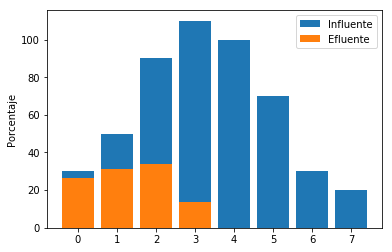

In [42]:
plt.bar(x,datos["NoPart"],0.8, label="Influente")
plt.bar(x,datos["ParRema"],0.8, label="Efluente")
plt.ylabel("Porcentaje")
plt.legend()
plt.show()
